## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  11.688313   551.291020  0.415700   5.739435  1.657778
1  30.239436  1748.925354  0.694521  10.144840  1.446794
2  67.676385  1323.365208  0.069896   3.271421  0.928386
3  82.862356   896.600969  0.115530   1.917265  0.745026
4  13.092180  1213.560273  0.703359  10.318575  1.638820


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.90344 | train_mse: 7.36007 | train_mae: 1.71913 |  0:00:00s
epoch 1  | loss: 0.59439 | train_mse: 2.25084 | train_mae: 1.10298 |  0:00:00s
epoch 2  | loss: 0.5243  | train_mse: 1.19913 | train_mae: 0.80908 |  0:00:00s


epoch 3  | loss: 0.58269 | train_mse: 1.31548 | train_mae: 0.88465 |  0:00:00s
epoch 4  | loss: 0.4551  | train_mse: 1.27813 | train_mae: 0.87757 |  0:00:00s
epoch 5  | loss: 0.45    | train_mse: 0.61174 | train_mae: 0.62878 |  0:00:00s


epoch 6  | loss: 0.37237 | train_mse: 0.63703 | train_mae: 0.59715 |  0:00:00s
epoch 7  | loss: 0.29516 | train_mse: 0.52303 | train_mae: 0.54952 |  0:00:00s
epoch 8  | loss: 0.4507  | train_mse: 0.58992 | train_mae: 0.58873 |  0:00:00s


epoch 9  | loss: 0.23887 | train_mse: 0.60227 | train_mae: 0.57463 |  0:00:00s
epoch 10 | loss: 0.45623 | train_mse: 0.68667 | train_mae: 0.58029 |  0:00:00s
epoch 11 | loss: 0.3005  | train_mse: 0.42296 | train_mae: 0.49061 |  0:00:00s


epoch 12 | loss: 0.28116 | train_mse: 0.31375 | train_mae: 0.42797 |  0:00:01s
epoch 13 | loss: 0.25463 | train_mse: 0.31615 | train_mae: 0.41775 |  0:00:01s


epoch 14 | loss: 0.25824 | train_mse: 0.30851 | train_mae: 0.42645 |  0:00:01s
epoch 15 | loss: 0.15538 | train_mse: 0.38122 | train_mae: 0.47041 |  0:00:01s
epoch 16 | loss: 0.17379 | train_mse: 0.48693 | train_mae: 0.51539 |  0:00:01s


epoch 17 | loss: 0.21148 | train_mse: 0.46388 | train_mae: 0.51114 |  0:00:01s
epoch 18 | loss: 0.20796 | train_mse: 0.35584 | train_mae: 0.4387  |  0:00:01s
epoch 19 | loss: 0.29292 | train_mse: 0.30761 | train_mae: 0.42154 |  0:00:01s


epoch 20 | loss: 0.19832 | train_mse: 0.19831 | train_mae: 0.34996 |  0:00:01s
epoch 21 | loss: 0.19095 | train_mse: 0.22717 | train_mae: 0.36163 |  0:00:01s
epoch 22 | loss: 0.16527 | train_mse: 0.28931 | train_mae: 0.41094 |  0:00:01s


epoch 23 | loss: 0.2212  | train_mse: 0.28854 | train_mae: 0.41279 |  0:00:02s
epoch 24 | loss: 0.19949 | train_mse: 0.27491 | train_mae: 0.40761 |  0:00:02s
epoch 25 | loss: 0.21448 | train_mse: 0.22628 | train_mae: 0.36262 |  0:00:02s


epoch 26 | loss: 0.21156 | train_mse: 0.13494 | train_mae: 0.28265 |  0:00:02s
epoch 27 | loss: 0.48668 | train_mse: 0.1416  | train_mae: 0.27545 |  0:00:02s


epoch 28 | loss: 0.19962 | train_mse: 0.14501 | train_mae: 0.28526 |  0:00:02s
epoch 29 | loss: 0.17667 | train_mse: 0.14145 | train_mae: 0.30211 |  0:00:02s
epoch 30 | loss: 0.16708 | train_mse: 0.17536 | train_mae: 0.32541 |  0:00:02s


epoch 31 | loss: 0.24456 | train_mse: 0.18612 | train_mae: 0.34373 |  0:00:02s
epoch 32 | loss: 0.22031 | train_mse: 0.15526 | train_mae: 0.30533 |  0:00:02s
epoch 33 | loss: 0.20194 | train_mse: 0.10645 | train_mae: 0.26868 |  0:00:02s
epoch 34 | loss: 0.18055 | train_mse: 0.14295 | train_mae: 0.29379 |  0:00:02s


epoch 35 | loss: 0.28243 | train_mse: 0.16619 | train_mae: 0.27212 |  0:00:03s
epoch 36 | loss: 0.31832 | train_mse: 0.16784 | train_mae: 0.27718 |  0:00:03s
epoch 37 | loss: 0.15592 | train_mse: 0.09497 | train_mae: 0.25759 |  0:00:03s
epoch 38 | loss: 0.17582 | train_mse: 0.09768 | train_mae: 0.26246 |  0:00:03s


epoch 39 | loss: 0.12817 | train_mse: 0.0942  | train_mae: 0.25712 |  0:00:03s
epoch 40 | loss: 0.14606 | train_mse: 0.09016 | train_mae: 0.24674 |  0:00:03s
epoch 41 | loss: 0.12837 | train_mse: 0.07851 | train_mae: 0.22761 |  0:00:03s


epoch 42 | loss: 0.14727 | train_mse: 0.07243 | train_mae: 0.22103 |  0:00:03s
epoch 43 | loss: 0.15102 | train_mse: 0.07123 | train_mae: 0.21457 |  0:00:03s
epoch 44 | loss: 0.11317 | train_mse: 0.06694 | train_mae: 0.20345 |  0:00:03s


epoch 45 | loss: 0.29571 | train_mse: 0.0779  | train_mae: 0.22328 |  0:00:03s
epoch 46 | loss: 0.12168 | train_mse: 0.07131 | train_mae: 0.20949 |  0:00:03s
epoch 47 | loss: 0.09146 | train_mse: 0.08191 | train_mae: 0.21309 |  0:00:03s
epoch 48 | loss: 0.14544 | train_mse: 0.11896 | train_mae: 0.25537 |  0:00:03s


epoch 49 | loss: 0.12933 | train_mse: 0.1587  | train_mae: 0.27589 |  0:00:04s
epoch 50 | loss: 0.17497 | train_mse: 0.13226 | train_mae: 0.25534 |  0:00:04s
epoch 51 | loss: 0.17186 | train_mse: 0.13237 | train_mae: 0.26277 |  0:00:04s
epoch 52 | loss: 0.14158 | train_mse: 0.09001 | train_mae: 0.2241  |  0:00:04s


epoch 53 | loss: 0.16058 | train_mse: 0.0969  | train_mae: 0.24006 |  0:00:04s
epoch 54 | loss: 0.21005 | train_mse: 0.1091  | train_mae: 0.25294 |  0:00:04s
epoch 55 | loss: 0.18889 | train_mse: 0.10943 | train_mae: 0.25889 |  0:00:04s
epoch 56 | loss: 0.14975 | train_mse: 0.11703 | train_mae: 0.26808 |  0:00:04s


epoch 57 | loss: 0.13841 | train_mse: 0.15534 | train_mae: 0.30366 |  0:00:04s
epoch 58 | loss: 0.14997 | train_mse: 0.15341 | train_mae: 0.30353 |  0:00:04s
epoch 59 | loss: 0.18406 | train_mse: 0.13984 | train_mae: 0.28654 |  0:00:04s


epoch 60 | loss: 0.1692  | train_mse: 0.1123  | train_mae: 0.26222 |  0:00:04s
epoch 61 | loss: 0.23356 | train_mse: 0.11273 | train_mae: 0.26152 |  0:00:04s
epoch 62 | loss: 0.29208 | train_mse: 0.10278 | train_mae: 0.24457 |  0:00:04s
epoch 63 | loss: 0.17689 | train_mse: 0.08692 | train_mae: 0.22575 |  0:00:04s


epoch 64 | loss: 0.14996 | train_mse: 0.08812 | train_mae: 0.22683 |  0:00:05s
epoch 65 | loss: 0.15147 | train_mse: 0.10509 | train_mae: 0.24829 |  0:00:05s
epoch 66 | loss: 0.18089 | train_mse: 0.11642 | train_mae: 0.2643  |  0:00:05s
epoch 67 | loss: 0.15951 | train_mse: 0.11082 | train_mae: 0.25427 |  0:00:05s


epoch 68 | loss: 0.1323  | train_mse: 0.10622 | train_mae: 0.25001 |  0:00:05s
epoch 69 | loss: 0.0928  | train_mse: 0.11906 | train_mae: 0.25928 |  0:00:05s
epoch 70 | loss: 0.12125 | train_mse: 0.12122 | train_mae: 0.2595  |  0:00:05s
epoch 71 | loss: 0.09189 | train_mse: 0.12473 | train_mae: 0.24442 |  0:00:05s


epoch 72 | loss: 0.11228 | train_mse: 0.12388 | train_mae: 0.24217 |  0:00:05s
epoch 73 | loss: 0.12515 | train_mse: 0.13325 | train_mae: 0.24191 |  0:00:05s
epoch 74 | loss: 0.29298 | train_mse: 0.15362 | train_mae: 0.25258 |  0:00:05s
epoch 75 | loss: 0.15472 | train_mse: 0.08972 | train_mae: 0.24212 |  0:00:05s


epoch 76 | loss: 0.14083 | train_mse: 0.07066 | train_mae: 0.21835 |  0:00:05s
epoch 77 | loss: 0.32188 | train_mse: 0.07008 | train_mae: 0.21693 |  0:00:05s
epoch 78 | loss: 0.14114 | train_mse: 0.0721  | train_mae: 0.20983 |  0:00:05s


epoch 79 | loss: 0.11591 | train_mse: 0.08098 | train_mae: 0.21583 |  0:00:06s
epoch 80 | loss: 0.08326 | train_mse: 0.06712 | train_mae: 0.19593 |  0:00:06s
epoch 81 | loss: 0.10566 | train_mse: 0.0678  | train_mae: 0.19764 |  0:00:06s
epoch 82 | loss: 0.08996 | train_mse: 0.06887 | train_mae: 0.19763 |  0:00:06s


epoch 83 | loss: 0.12646 | train_mse: 0.06808 | train_mae: 0.19859 |  0:00:06s
epoch 84 | loss: 0.15393 | train_mse: 0.0603  | train_mae: 0.18933 |  0:00:06s
epoch 85 | loss: 0.26835 | train_mse: 0.06805 | train_mae: 0.1975  |  0:00:06s
epoch 86 | loss: 0.17797 | train_mse: 0.07608 | train_mae: 0.20304 |  0:00:06s


epoch 87 | loss: 0.09517 | train_mse: 0.09005 | train_mae: 0.21723 |  0:00:06s
epoch 88 | loss: 0.1228  | train_mse: 0.08149 | train_mae: 0.21016 |  0:00:06s
epoch 89 | loss: 0.12321 | train_mse: 0.06216 | train_mae: 0.19336 |  0:00:06s
epoch 90 | loss: 0.08179 | train_mse: 0.06303 | train_mae: 0.19951 |  0:00:06s


epoch 91 | loss: 0.12898 | train_mse: 0.05839 | train_mae: 0.18453 |  0:00:06s
epoch 92 | loss: 0.11258 | train_mse: 0.06015 | train_mae: 0.18925 |  0:00:06s
epoch 93 | loss: 0.1121  | train_mse: 0.06688 | train_mae: 0.1928  |  0:00:06s
epoch 94 | loss: 0.12166 | train_mse: 0.07026 | train_mae: 0.19741 |  0:00:07s


epoch 95 | loss: 0.13812 | train_mse: 0.07667 | train_mae: 0.19496 |  0:00:07s
epoch 96 | loss: 0.2314  | train_mse: 0.12393 | train_mae: 0.21552 |  0:00:07s
epoch 97 | loss: 0.13003 | train_mse: 0.1204  | train_mae: 0.22071 |  0:00:07s
epoch 98 | loss: 0.18062 | train_mse: 0.12759 | train_mae: 0.23392 |  0:00:07s


epoch 99 | loss: 0.10369 | train_mse: 0.13201 | train_mae: 0.24622 |  0:00:07s
epoch 100| loss: 0.15761 | train_mse: 0.10187 | train_mae: 0.22212 |  0:00:07s
epoch 101| loss: 0.1128  | train_mse: 0.06362 | train_mae: 0.1958  |  0:00:07s


epoch 102| loss: 0.07573 | train_mse: 0.05874 | train_mae: 0.18985 |  0:00:07s
epoch 103| loss: 0.2059  | train_mse: 0.07012 | train_mae: 0.21118 |  0:00:07s
epoch 104| loss: 0.12539 | train_mse: 0.07894 | train_mae: 0.21752 |  0:00:07s
epoch 105| loss: 0.09548 | train_mse: 0.07973 | train_mae: 0.218   |  0:00:07s


epoch 106| loss: 0.12383 | train_mse: 0.06835 | train_mae: 0.20529 |  0:00:07s
epoch 107| loss: 0.21593 | train_mse: 0.07044 | train_mae: 0.20577 |  0:00:07s
epoch 108| loss: 0.10071 | train_mse: 0.09468 | train_mae: 0.22634 |  0:00:07s
epoch 109| loss: 0.11486 | train_mse: 0.12389 | train_mae: 0.26646 |  0:00:08s


epoch 110| loss: 0.12903 | train_mse: 0.14049 | train_mae: 0.2862  |  0:00:08s
epoch 111| loss: 0.12058 | train_mse: 0.11217 | train_mae: 0.25056 |  0:00:08s
epoch 112| loss: 0.13173 | train_mse: 0.08679 | train_mae: 0.23547 |  0:00:08s
epoch 113| loss: 0.1006  | train_mse: 0.08351 | train_mae: 0.22893 |  0:00:08s


epoch 114| loss: 0.1067  | train_mse: 0.08591 | train_mae: 0.22615 |  0:00:08s
epoch 115| loss: 0.10446 | train_mse: 0.08227 | train_mae: 0.2221  |  0:00:08s
epoch 116| loss: 0.1329  | train_mse: 0.07922 | train_mae: 0.22336 |  0:00:08s


epoch 117| loss: 0.1084  | train_mse: 0.08524 | train_mae: 0.22822 |  0:00:08s
epoch 118| loss: 0.07892 | train_mse: 0.07341 | train_mae: 0.20596 |  0:00:08s
epoch 119| loss: 0.06941 | train_mse: 0.07262 | train_mae: 0.19883 |  0:00:08s
epoch 120| loss: 0.16236 | train_mse: 0.07072 | train_mae: 0.19668 |  0:00:08s


epoch 121| loss: 0.29323 | train_mse: 0.06617 | train_mae: 0.20075 |  0:00:08s
epoch 122| loss: 0.11607 | train_mse: 0.06409 | train_mae: 0.18998 |  0:00:08s
epoch 123| loss: 0.08746 | train_mse: 0.06366 | train_mae: 0.19057 |  0:00:08s
epoch 124| loss: 0.09455 | train_mse: 0.06802 | train_mae: 0.19999 |  0:00:09s


epoch 125| loss: 0.08743 | train_mse: 0.06192 | train_mae: 0.189   |  0:00:09s
epoch 126| loss: 0.07964 | train_mse: 0.05886 | train_mae: 0.18675 |  0:00:09s
epoch 127| loss: 0.07769 | train_mse: 0.05498 | train_mae: 0.18341 |  0:00:09s
epoch 128| loss: 0.17723 | train_mse: 0.05837 | train_mae: 0.18949 |  0:00:09s


epoch 129| loss: 0.13221 | train_mse: 0.07836 | train_mae: 0.2123  |  0:00:09s
epoch 130| loss: 0.18188 | train_mse: 0.11277 | train_mae: 0.24745 |  0:00:09s
epoch 131| loss: 0.1136  | train_mse: 0.1234  | train_mae: 0.25683 |  0:00:09s


epoch 132| loss: 0.19015 | train_mse: 0.10979 | train_mae: 0.24433 |  0:00:09s
epoch 133| loss: 0.0972  | train_mse: 0.07471 | train_mae: 0.20056 |  0:00:09s
epoch 134| loss: 0.09761 | train_mse: 0.06672 | train_mae: 0.19858 |  0:00:09s


epoch 135| loss: 0.14981 | train_mse: 0.07021 | train_mae: 0.20609 |  0:00:09s
epoch 136| loss: 0.16736 | train_mse: 0.07446 | train_mae: 0.20479 |  0:00:09s
epoch 137| loss: 0.11038 | train_mse: 0.07457 | train_mae: 0.20304 |  0:00:10s
epoch 138| loss: 0.09953 | train_mse: 0.08433 | train_mae: 0.21533 |  0:00:10s


epoch 139| loss: 0.10425 | train_mse: 0.07131 | train_mae: 0.19825 |  0:00:10s
epoch 140| loss: 0.09954 | train_mse: 0.05886 | train_mae: 0.17855 |  0:00:10s
epoch 141| loss: 0.14621 | train_mse: 0.05252 | train_mae: 0.16984 |  0:00:10s


epoch 142| loss: 0.11584 | train_mse: 0.05877 | train_mae: 0.18819 |  0:00:10s
epoch 143| loss: 0.16209 | train_mse: 0.06122 | train_mae: 0.18916 |  0:00:10s
epoch 144| loss: 0.10788 | train_mse: 0.05723 | train_mae: 0.17716 |  0:00:10s
epoch 145| loss: 0.09131 | train_mse: 0.06319 | train_mae: 0.18496 |  0:00:10s


epoch 146| loss: 0.10628 | train_mse: 0.06119 | train_mae: 0.18695 |  0:00:10s
epoch 147| loss: 0.2123  | train_mse: 0.06143 | train_mae: 0.18301 |  0:00:10s


epoch 148| loss: 0.07856 | train_mse: 0.06996 | train_mae: 0.19458 |  0:00:10s
epoch 149| loss: 0.0737  | train_mse: 0.06966 | train_mae: 0.1946  |  0:00:10s
epoch 150| loss: 0.0804  | train_mse: 0.07154 | train_mae: 0.20076 |  0:00:10s
epoch 151| loss: 0.09368 | train_mse: 0.07238 | train_mae: 0.20125 |  0:00:11s


epoch 152| loss: 0.14422 | train_mse: 0.06865 | train_mae: 0.19882 |  0:00:11s
epoch 153| loss: 0.11401 | train_mse: 0.06674 | train_mae: 0.2001  |  0:00:11s
epoch 154| loss: 0.12155 | train_mse: 0.06506 | train_mae: 0.19805 |  0:00:11s
epoch 155| loss: 0.07022 | train_mse: 0.06493 | train_mae: 0.19572 |  0:00:11s


epoch 156| loss: 0.15796 | train_mse: 0.07021 | train_mae: 0.19855 |  0:00:11s
epoch 157| loss: 0.0847  | train_mse: 0.05983 | train_mae: 0.19457 |  0:00:11s
epoch 158| loss: 0.12614 | train_mse: 0.07004 | train_mae: 0.21219 |  0:00:11s


epoch 159| loss: 0.15076 | train_mse: 0.08427 | train_mae: 0.23466 |  0:00:11s
epoch 160| loss: 0.06562 | train_mse: 0.07309 | train_mae: 0.21711 |  0:00:11s
epoch 161| loss: 0.23948 | train_mse: 0.0722  | train_mae: 0.21395 |  0:00:11s


epoch 162| loss: 0.15013 | train_mse: 0.07705 | train_mae: 0.21896 |  0:00:11s
epoch 163| loss: 0.09332 | train_mse: 0.07515 | train_mae: 0.21235 |  0:00:11s
epoch 164| loss: 0.1164  | train_mse: 0.08247 | train_mae: 0.22376 |  0:00:11s
epoch 165| loss: 0.06935 | train_mse: 0.08465 | train_mae: 0.2273  |  0:00:12s


epoch 166| loss: 0.10803 | train_mse: 0.07938 | train_mae: 0.22468 |  0:00:12s
epoch 167| loss: 0.20295 | train_mse: 0.06953 | train_mae: 0.21245 |  0:00:12s
epoch 168| loss: 0.11587 | train_mse: 0.0648  | train_mae: 0.20119 |  0:00:12s
epoch 169| loss: 0.066   | train_mse: 0.05353 | train_mae: 0.18126 |  0:00:12s


epoch 170| loss: 0.11901 | train_mse: 0.0531  | train_mae: 0.18125 |  0:00:12s
epoch 171| loss: 0.16639 | train_mse: 0.05612 | train_mae: 0.18462 |  0:00:12s
epoch 172| loss: 0.09013 | train_mse: 0.09299 | train_mae: 0.20976 |  0:00:12s
epoch 173| loss: 0.0947  | train_mse: 0.09559 | train_mae: 0.20948 |  0:00:12s


epoch 174| loss: 0.15844 | train_mse: 0.07838 | train_mae: 0.21417 |  0:00:12s
epoch 175| loss: 0.0946  | train_mse: 0.07777 | train_mae: 0.22021 |  0:00:12s
epoch 176| loss: 0.07952 | train_mse: 0.09066 | train_mae: 0.22084 |  0:00:12s


epoch 177| loss: 0.08579 | train_mse: 0.08434 | train_mae: 0.22058 |  0:00:12s
epoch 178| loss: 0.09992 | train_mse: 0.06835 | train_mae: 0.20891 |  0:00:12s
epoch 179| loss: 0.12415 | train_mse: 0.06614 | train_mae: 0.20522 |  0:00:12s
epoch 180| loss: 0.14855 | train_mse: 0.10368 | train_mae: 0.2354  |  0:00:13s


epoch 181| loss: 0.20865 | train_mse: 0.12319 | train_mae: 0.25613 |  0:00:13s
epoch 182| loss: 0.26178 | train_mse: 0.09731 | train_mae: 0.22608 |  0:00:13s
epoch 183| loss: 0.12296 | train_mse: 0.07446 | train_mae: 0.20592 |  0:00:13s


epoch 184| loss: 0.09911 | train_mse: 0.07041 | train_mae: 0.19983 |  0:00:13s
epoch 185| loss: 0.0705  | train_mse: 0.08069 | train_mae: 0.21594 |  0:00:13s
epoch 186| loss: 0.16218 | train_mse: 0.09957 | train_mae: 0.23638 |  0:00:13s


epoch 187| loss: 0.09558 | train_mse: 0.08581 | train_mae: 0.22226 |  0:00:13s
epoch 188| loss: 0.11881 | train_mse: 0.08239 | train_mae: 0.21578 |  0:00:13s
epoch 189| loss: 0.11095 | train_mse: 0.07594 | train_mae: 0.20715 |  0:00:13s


epoch 190| loss: 0.0882  | train_mse: 0.0829  | train_mae: 0.21384 |  0:00:13s
epoch 191| loss: 0.07554 | train_mse: 0.07534 | train_mae: 0.20634 |  0:00:13s

Early stopping occurred at epoch 191 with best_epoch = 141 and best_train_mae = 0.16984
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

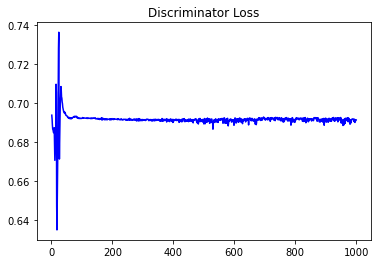

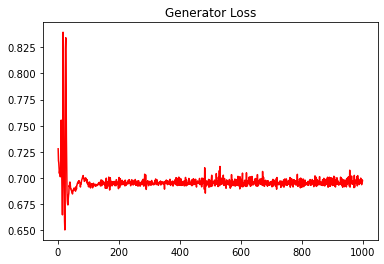

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2661930446027482


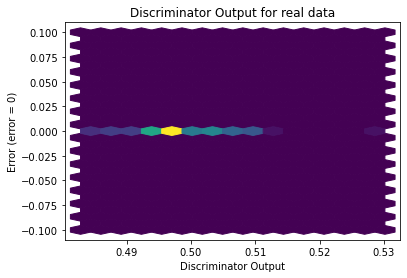

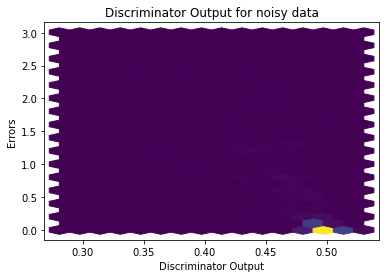

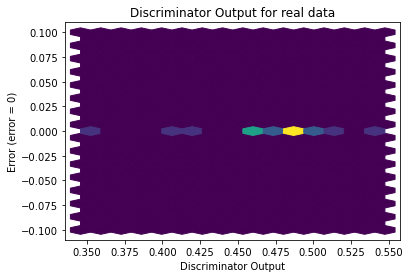

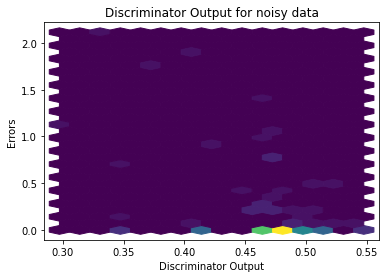

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


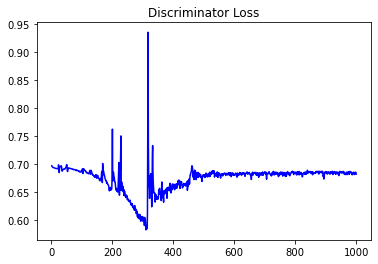

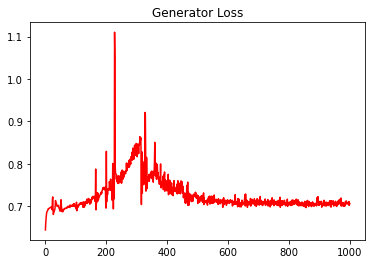

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.44521212686390665


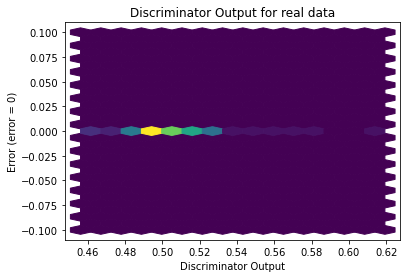

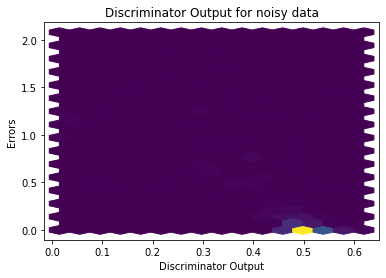

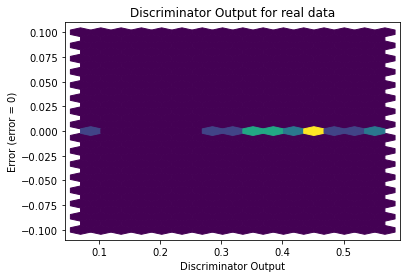

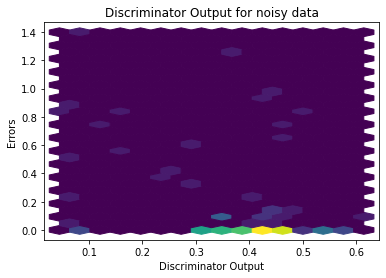

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1147]], requires_grad=True)
